In [2]:
# --- CONFIGURACIÓN INICIAL ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, ConfusionMatrixDisplay,
                           RocCurveDisplay, PrecisionRecallDisplay)
from matplotlib.gridspec import GridSpec

# Configuración de estilo
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
sns.set_palette("viridis")

# --- CARGA DE MODELOS ---
print("\033[1m🔷 CARGANDO MODELOS DESDE ARCHIVOS\033[0m")

# Cargar modelo base
try:
    base_model = joblib.load('C:/Users/ferna/OneDrive/Escritorio/corpusMentalRiskES/NUEVO_EDA_EXTRACCION/ENTRENAMIENTO/modelos_entrenados/svm_basico_mejorado_mentalriskes.pkl')
    
    if isinstance(base_model, dict):  # Si es un diccionario (con metadatos)
        base_model = base_model['modelo']
    print("✅ Modelo base cargado correctamente")
except Exception as e:
    print(f"❌ Error al cargar modelo base: {str(e)}")
    raise

# Cargar modelo optimizado
try:
    optuna_model = joblib.load('C:/Users/ferna/OneDrive/Escritorio/corpusMentalRiskES/NUEVO_EDA_EXTRACCION/ENTRENAMIENTO/modelos_entrenados/svm_optimizado_optuna.pkl')
    if isinstance(optuna_model, dict):  # Si es un diccionario (con metadatos)
        optuna_model = optuna_model['modelo']
    print("✅ Modelo optimizado cargado correctamente")
except Exception as e:
    print(f"❌ Error al cargar modelo optimizado: {str(e)}")
    raise

🔷 CARGANDO MODELOS DESDE ARCHIVOS
✅ Modelo base cargado correctamente
✅ Modelo optimizado cargado correctamente


In [3]:
# --- FUNCIÓN PARA EVALUACIÓN ---
def evaluate_model(model, X, y):
    """Evalúa un modelo y devuelve métricas principales"""
    y_pred = model.predict(X)
    return {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1': f1_score(y, y_pred),
        'CM': confusion_matrix(y, y_pred)
    }

In [4]:
# --- CARGAR DATOS DE PRUEBA ---
print("\n\033[1m🔷 CARGANDO DATOS DE PRUEBA\033[0m")
try:
    X_test = np.load('C:/Users/ferna/OneDrive/Escritorio/corpusMentalRiskES/NUEVO_EDA_EXTRACCION/ENTRENAMIENTO/X_balanceado.npy')
    y_test = np.load('C:/Users/ferna/OneDrive/Escritorio/corpusMentalRiskES/NUEVO_EDA_EXTRACCION/ENTRENAMIENTO/y_balanceado.npy')
    print(f"✅ Datos cargados: {X_test.shape[0]} muestras con {X_test.shape[1]} características")
except Exception as e:
    print(f"❌ Error al cargar datos: {str(e)}")
    raise

# Dividir datos (usaremos solo test para comparación justa)
_, X_test, _, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# --- EVALUACIÓN DE MODELOS ---
print("\n\033[1m🔷 EVALUANDO MODELOS\033[0m")
base_metrics = evaluate_model(base_model, X_test, y_test)
optuna_metrics = evaluate_model(optuna_model, X_test, y_test)


🔷 CARGANDO DATOS DE PRUEBA
✅ Datos cargados: 26544 muestras con 128 características

🔷 EVALUANDO MODELOS



📊 GENERANDO GRÁFICO COMPARATIVO


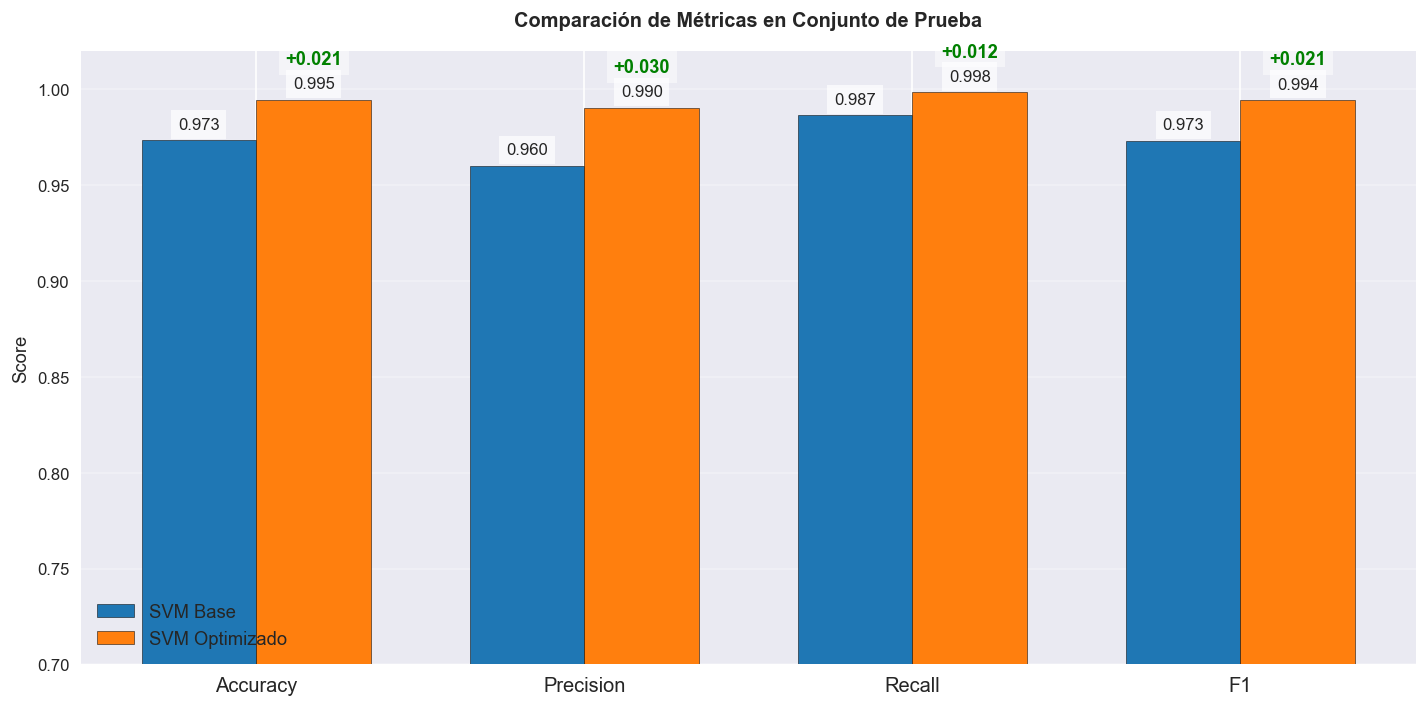

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# --- GRÁFICO COMPARATIVO DE MÉTRICAS ---
print("\n\033[1m📊 GENERANDO GRÁFICO COMPARATIVO\033[0m")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
base_scores = [base_metrics[m] for m in metrics]
optuna_scores = [optuna_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, base_scores, width, label='SVM Base', color='#1f77b4', edgecolor='black')
rects2 = ax.bar(x + width/2, optuna_scores, width, label='SVM Optimizado', color='#ff7f0e', edgecolor='black')

ax.set_title('Comparación de Métricas en Conjunto de Prueba', fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Score')
ax.set_ylim(0.7, 1.02)
ax.grid(axis='y', alpha=0.3)
ax.legend(fontsize=11)

# Añadir valores encima de cada barra
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),  # 🟢 Separación mayor del borde
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))  # 🟢 Mejora contraste

# Añadir mejoras en verde
for i, (base, optuna) in enumerate(zip(base_scores, optuna_scores)):
    improvement = optuna - base
    if improvement > 0:
        ax.annotate(f'+{improvement:.3f}',
                    xy=(x[i] + width/2, optuna),
                    xytext=(0, 19),  # 🟢 Más alto
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=11,
                    color='green',
                    fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.tight_layout()
plt.savefig('visualizaciones/comparacion_metricas_test.png', dpi=300, bbox_inches='tight')
plt.show()

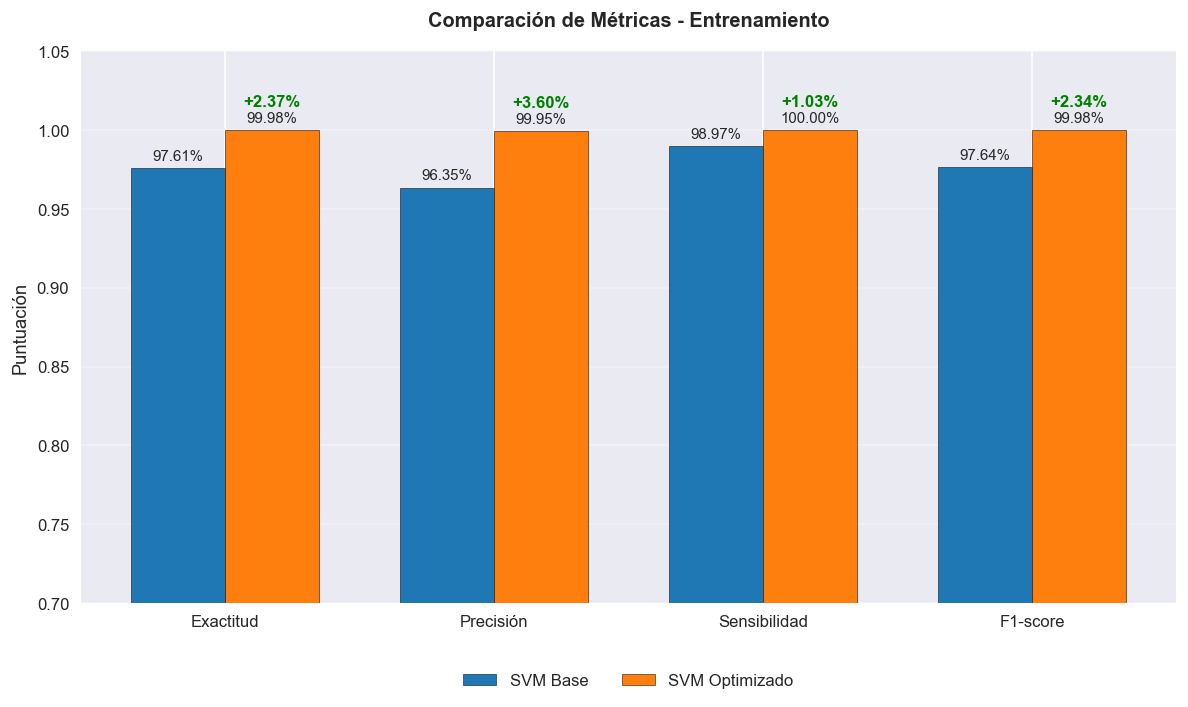

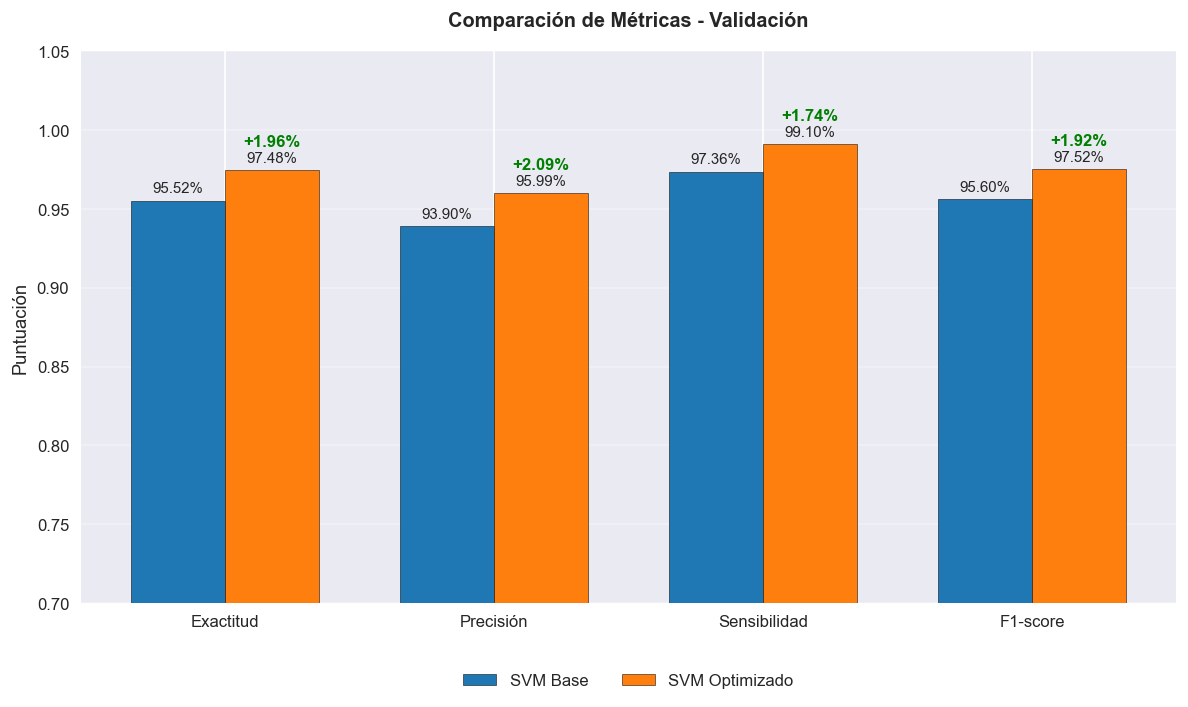

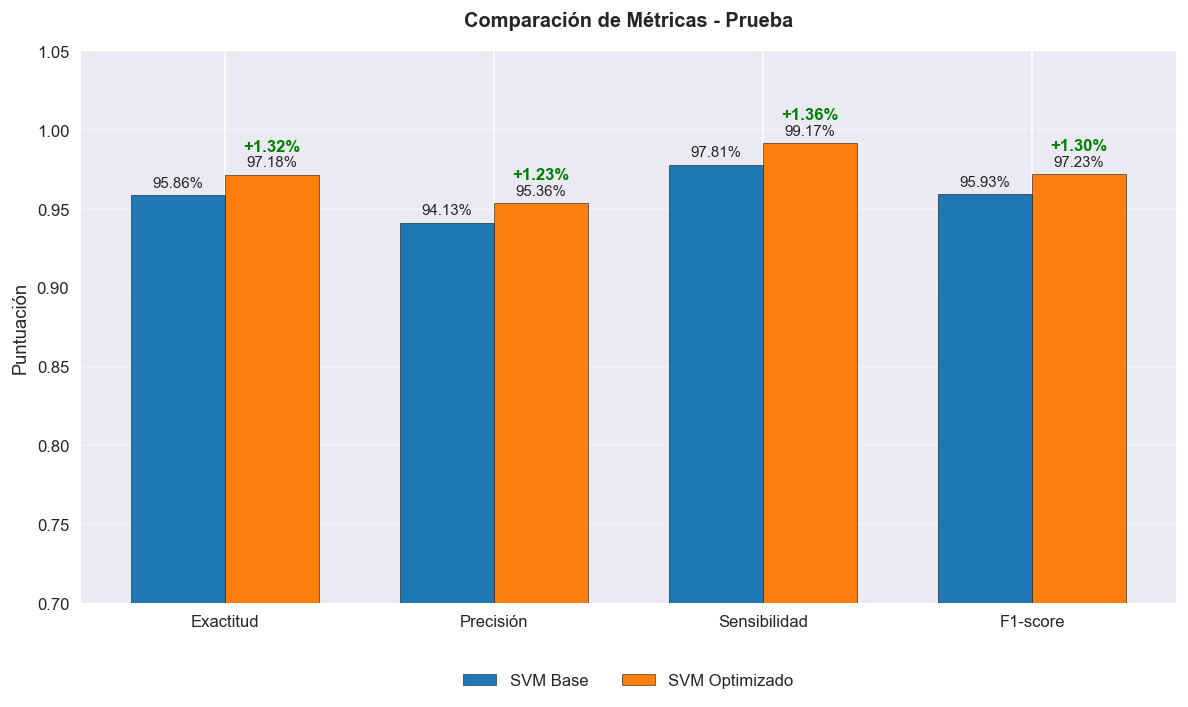

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

# Datos para comparación
modelos = ['SVM Base', 'SVM Optimizado']
conjuntos = ['Entrenamiento', 'Validación', 'Prueba']
metricas = ['Exactitud', 'Precisión', 'Sensibilidad', 'F1-score']

# Datos del modelo base (valores en decimal)
base_data = {
    'Entrenamiento': [0.9761, 0.9635, 0.9897, 0.9764],
    'Validación': [0.9552, 0.9390, 0.9736, 0.9560],
    'Prueba': [0.9586, 0.9413, 0.9781, 0.9593]
}

# Datos del modelo optimizado (valores en decimal)
optuna_data = {
    'Entrenamiento': [0.9998, 0.9995, 1.0000, 0.9998],
    'Validación': [0.9748, 0.9599, 0.9910, 0.9752],
    'Prueba': [0.9718, 0.9536, 0.9917, 0.9723]
}

# Crear gráficos para cada conjunto
for conjunto in conjuntos:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Posiciones de las barras
    x = np.arange(len(metricas))
    width = 0.35
    
    # Crear barras
    rects1 = ax.bar(x - width/2, base_data[conjunto], width, 
                   label='SVM Base', color='#1f77b4', edgecolor='black')
    rects2 = ax.bar(x + width/2, optuna_data[conjunto], width, 
                   label='SVM Optimizado', color='#ff7f0e', edgecolor='black')
    
    # Añadir texto, etiquetas y título
    ax.set_title(f'Comparación de Métricas - {conjunto}', fontweight='bold', pad=15)
    ax.set_xticks(x)
    ax.set_xticklabels(metricas)
    ax.set_ylabel('Puntuación')
    ax.set_ylim(0.7, 1.05)
    ax.grid(axis='y', alpha=0.3)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # Añadir valores en las barras
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)
    
    # Mejorar layout
    plt.tight_layout()
    
    # Resaltar mejoras
    for i in range(len(metricas)):
        improvement = optuna_data[conjunto][i] - base_data[conjunto][i]
        if improvement > 0:
            ax.text(x[i] + width/2, optuna_data[conjunto][i] + 0.015, 
                   f'+{improvement:.2%}', ha='center', color='green', fontweight='bold')
    
    plt.savefig(f'visualizaciones/comparacion_{conjunto.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()


📈 GENERANDO MATRICES DE CONFUSIÓN COMPARATIVAS


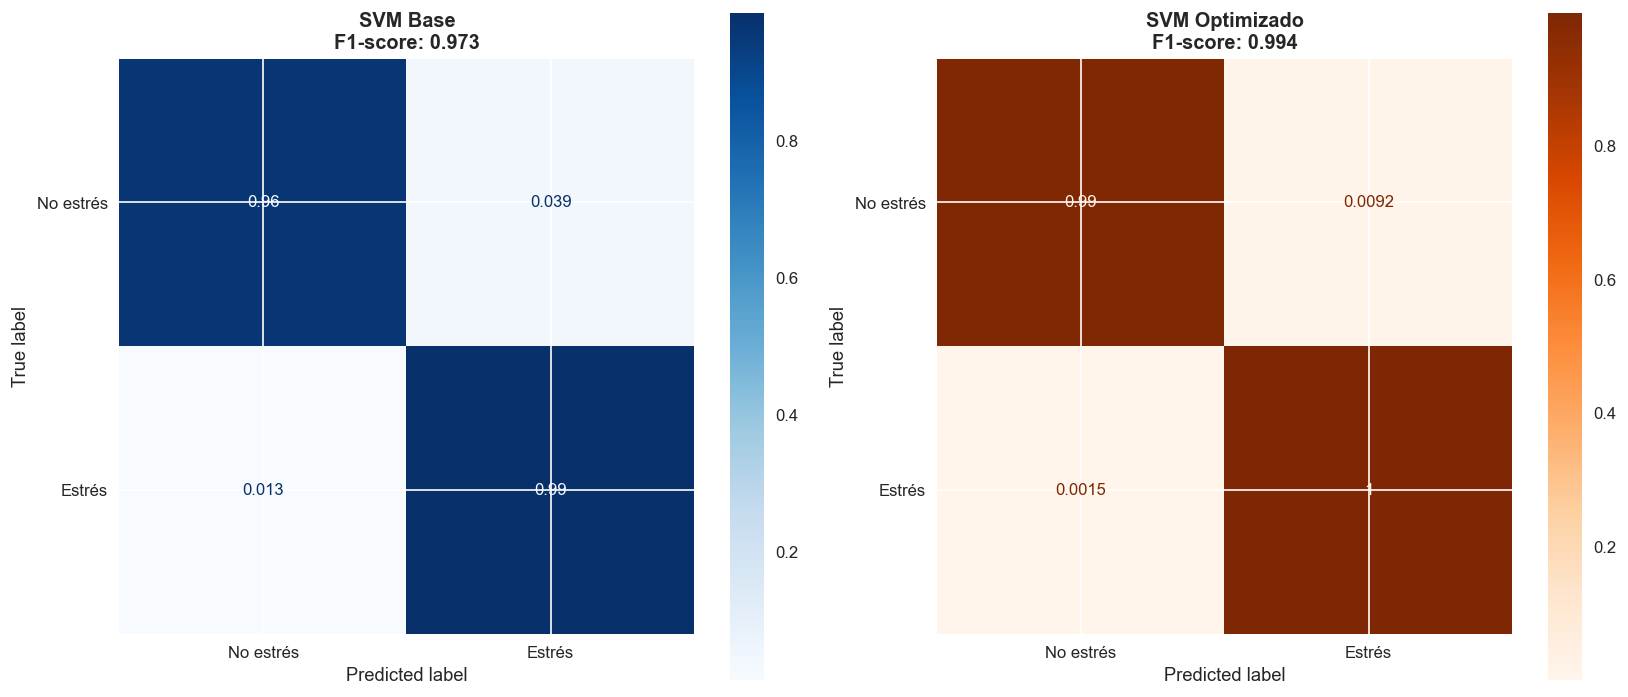

In [7]:
# --- MATRICES DE CONFUSIÓN COMPARATIVAS ---
print("\n\033[1m📈 GENERANDO MATRICES DE CONFUSIÓN COMPARATIVAS\033[0m")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Matriz para modelo base
ConfusionMatrixDisplay.from_estimator(base_model, X_test, y_test,
                                    display_labels=['No estrés', 'Estrés'],
                                    cmap='Blues', ax=ax1, normalize='true')
ax1.set_title('SVM Base\nF1-score: {:.3f}'.format(base_metrics['F1']), fontweight='bold')

# Matriz para modelo optimizado
ConfusionMatrixDisplay.from_estimator(optuna_model, X_test, y_test,
                                    display_labels=['No estrés', 'Estrés'],
                                    cmap='Oranges', ax=ax2, normalize='true')
ax2.set_title('SVM Optimizado\nF1-score: {:.3f}'.format(optuna_metrics['F1']), fontweight='bold')

plt.tight_layout()
plt.savefig('visualizaciones/confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


📉 GENERANDO CURVAS ROC COMPARATIVAS


<Figure size 960x720 with 0 Axes>

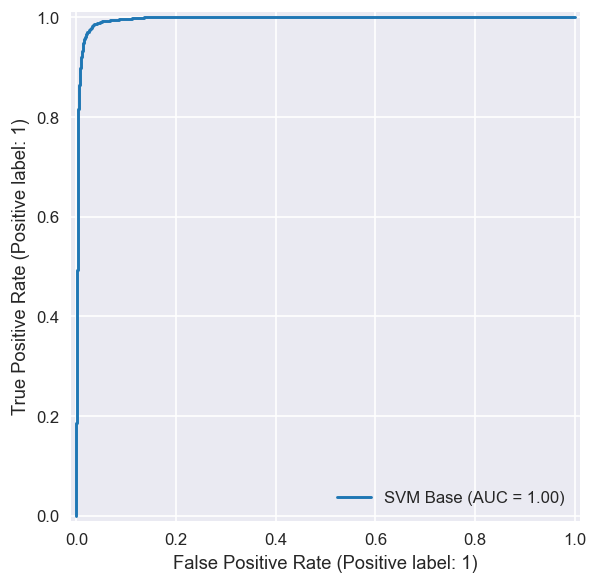

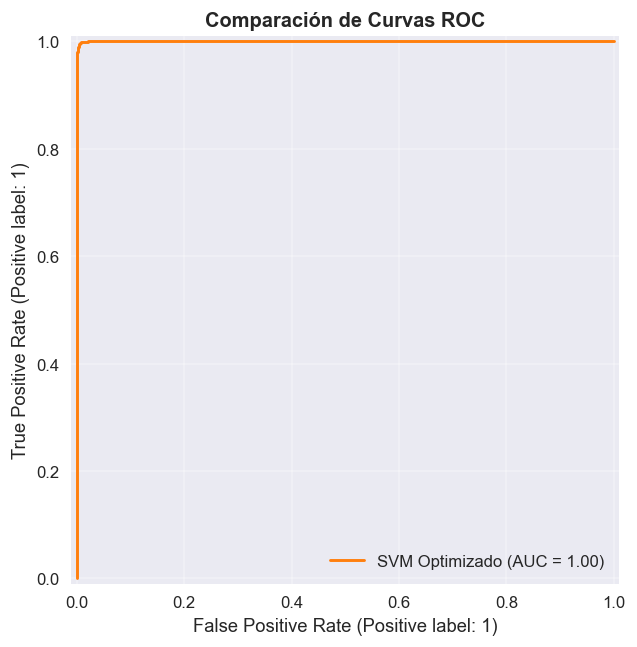

In [8]:
# --- CURVAS ROC COMPARATIVAS ---
print("\n\033[1m📉 GENERANDO CURVAS ROC COMPARATIVAS\033[0m")
plt.figure(figsize=(8, 6))

# Curva ROC para modelo base
RocCurveDisplay.from_estimator(base_model, X_test, y_test,
                             name='SVM Base', color='#1f77b4')

# Curva ROC para modelo optimizado
RocCurveDisplay.from_estimator(optuna_model, X_test, y_test,
                             name='SVM Optimizado', color='#ff7f0e')

plt.title('Comparación de Curvas ROC', fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('visualizaciones/roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


📈 GENERANDO CURVAS PRECISION-RECALL


<Figure size 960x720 with 0 Axes>

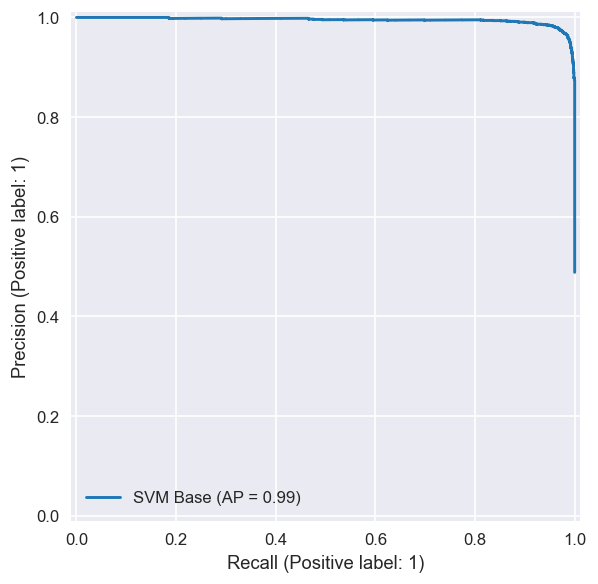

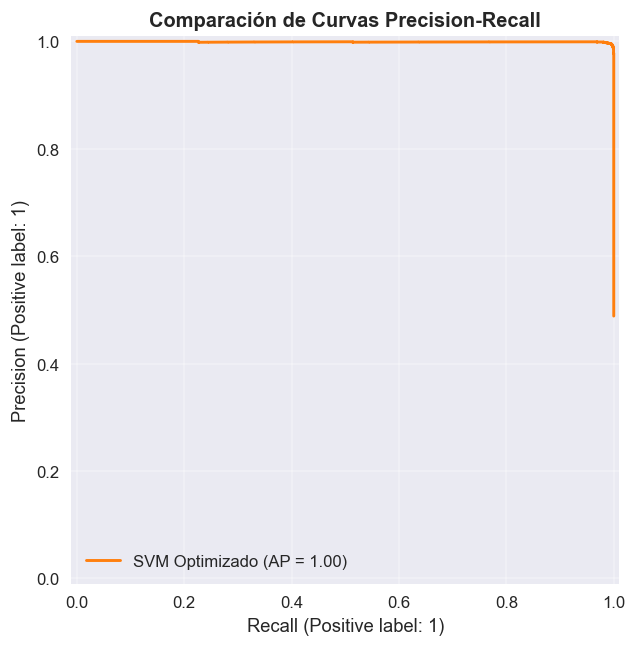

In [9]:
# --- CURVAS PRECISION-RECALL COMPARATIVAS ---
print("\n\033[1m📈 GENERANDO CURVAS PRECISION-RECALL\033[0m")
plt.figure(figsize=(8, 6))

# Curva para modelo base
PrecisionRecallDisplay.from_estimator(base_model, X_test, y_test,
                                    name='SVM Base', color='#1f77b4')

# Curva para modelo optimizado
PrecisionRecallDisplay.from_estimator(optuna_model, X_test, y_test,
                                    name='SVM Optimizado', color='#ff7f0e')

plt.title('Comparación de Curvas Precision-Recall', fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('visualizaciones/pr_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



📋 GENERANDO TABLA COMPARATIVA


,Métrica,SVM Base,SVM Optimizado,Mejora Absoluta,Mejora Relativa
0,Accuracy,0.9734,0.9945,0.0211,2.17%
1,Precision,0.9602,0.9904,0.0302,3.15%
2,Recall,0.9865,0.9985,0.0120,1.21%
3,F1,0.9732,0.9944,0.0213,2.18%



📊 GENERANDO GRÁFICO DE CALIBRACIÓN


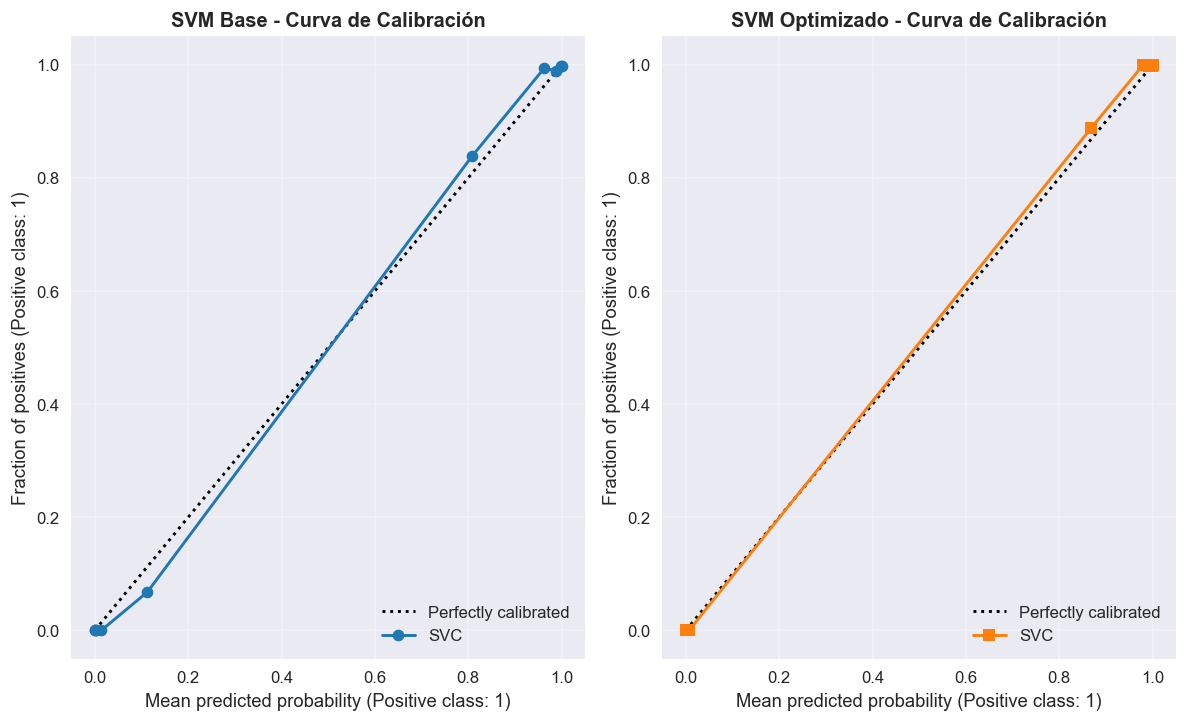


🎉 ANÁLISIS COMPARATIVO COMPLETADO CON ÉXITO 🎉


In [10]:
# --- TABLA COMPARATIVA DETALLADA ---
print("\n\033[1m📋 GENERANDO TABLA COMPARATIVA\033[0m")
comparison_data = []
for metric in metrics:
    base_val = base_metrics[metric]
    optuna_val = optuna_metrics[metric]
    improvement = optuna_val - base_val
    improvement_pct = (improvement / base_val) * 100 if base_val != 0 else 0
    
    comparison_data.append({
        'Métrica': metric,
        'SVM Base': f'{base_val:.4f}',
        'SVM Optimizado': f'{optuna_val:.4f}',
        'Mejora Absoluta': f'{improvement:.4f}',
        'Mejora Relativa': f'{improvement_pct:.2f}%'
    })

comparison_df = pd.DataFrame(comparison_data)

# Mostrar tabla con estilo
def color_improvement(val):
    try:
        color = 'green' if float(val.strip('%')) > 0 else 'red' if float(val.strip('%')) < 0 else 'black'
    except:
        color = 'black'
    return f'color: {color}'

display(comparison_df.style
        .map(color_improvement, subset=['Mejora Relativa'])  # ✅ Sin deprecation warning
        .background_gradient(cmap='Blues', subset=['SVM Base', 'SVM Optimizado'])
        .set_caption("Comparación Detallada de Métricas en Conjunto de Prueba"))

# --- GRÁFICO DE CALIBRACIÓN COMPARATIVO ---
print("\n\033[1m📊 GENERANDO GRÁFICO DE CALIBRACIÓN\033[0m")
plt.figure(figsize=(10, 8))

# Crear subgráficos
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 1])

# Curva de calibración para modelo base
ax1 = plt.subplot(gs[0, 0])
CalibrationDisplay.from_estimator(base_model, X_test, y_test, 
                                  n_bins=10, strategy='quantile',
                                  ax=ax1, color='#1f77b4', marker='o')
ax1.set_title('SVM Base - Curva de Calibración', fontweight='bold')
ax1.grid(alpha=0.3)

# Curva de calibración para modelo optimizado
ax2 = plt.subplot(gs[0, 1])
CalibrationDisplay.from_estimator(optuna_model, X_test, y_test,
                                  n_bins=10, strategy='quantile',
                                  ax=ax2, color='#ff7f0e', marker='s')
ax2.set_title('SVM Optimizado - Curva de Calibración', fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visualizaciones/calibration_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n\033[1m🎉 ANÁLISIS COMPARATIVO COMPLETADO CON ÉXITO 🎉\033[0m")

In [13]:
import pandas as pd

def styled_comparison_table():
    # Datos actualizados con tus métricas reales
    data = {
        'Métrica': ['Exactitud (Prueba)', 'Precisión (Prueba)', 'Recall/Sensibilidad (Prueba)', 'F1-Score (Prueba)', 
                   'Vectores Soporte', 'Tiempo Entrenamiento (s)'],
        'SVM Base': ['95.86%', '94.13%', '97.81%', '95.93%', '5739', '125.16'],
        'SVM Optimizado': ['97.18%', '95.36%', '99.17%', '97.23%', '4249', '248.40'],
        'Mejora': [
            f'+{97.18-95.86:.2f}%', 
            f'+{95.36-94.13:.2f}%', 
            f'+{99.17-97.81:.2f}%', 
            f'+{97.23-95.93:.2f}%', 
            f'-{(5739-4249)/5739*100:.1f}%', 
            f'+{248.40-125.16:.1f}%'
        ]
    }
    df = pd.DataFrame(data)

    # Estilo condicional solo para la columna 'Mejora'
    def improvement_style(val):
        if isinstance(val, str):
            if '+' in val and 'Vectores' not in val and 'Tiempo' not in val:
                return 'color: green; font-weight: bold'
            elif '-' in val or ('+' in val and ('Vectores' in val or 'Tiempo' in val)):
                return 'color: red; font-weight: bold'
        return 'color: black'

    # Crear styler
    styled_df = df.style\
        .map(improvement_style, subset=['Mejora'])\
        .set_properties(**{'text-align': 'center'})\
        .set_table_styles([
            {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
        ])\
        .set_caption('Comparación Detallada de Modelos SVM (Conjunto de Prueba)')

    display(styled_df)

    # Guardar como HTML
    with open('visualizaciones/comparacion_modelos.html', 'w', encoding='utf-8') as f:
        f.write(styled_df.to_html())

styled_comparison_table()

,Métrica,SVM Base,SVM Optimizado,Mejora
0,Exactitud (Prueba),95.86%,97.18%,+1.32%
1,Precisión (Prueba),94.13%,95.36%,+1.23%
2,Recall/Sensibilidad (Prueba),97.81%,99.17%,+1.36%
3,F1-Score (Prueba),95.93%,97.23%,+1.30%
4,Vectores Soporte,5739,4249,-26.0%
5,Tiempo Entrenamiento (s),125.16,248.40,+123.2%


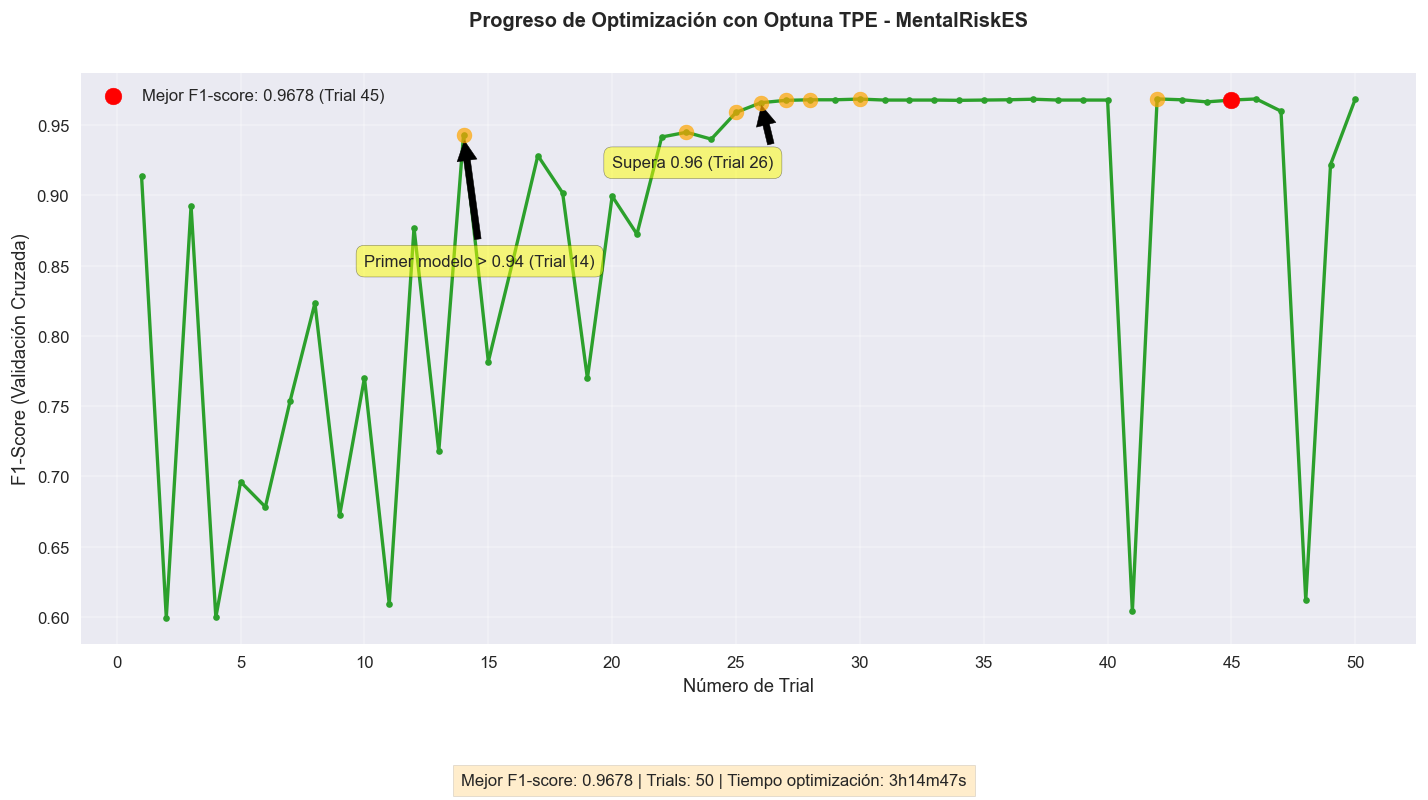

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def optimization_progress():
    # Datos reales de la optimización (50 trials)
    f1_scores = [
        0.9141, 0.5995, 0.8925, 0.5998, 0.6962, 0.6783, 0.7538, 0.8233, 
        0.6726, 0.7702, 0.6093, 0.8769, 0.7178, 0.9432, 0.7817, 0.8540,
        0.9283, 0.9017, 0.7698, 0.8994, 0.8724, 0.9415, 0.9449, 0.9400,
        0.9590, 0.9659, 0.9676, 0.9680, 0.9680, 0.9685, 0.9678, 0.9678,
        0.9678, 0.9676, 0.9678, 0.9680, 0.9684, 0.9678, 0.9678, 0.9678,
        0.6041, 0.9686, 0.9680, 0.9665, 0.9678, 0.9686, 0.9599, 0.6119,
        0.9219, 0.9686
    ]
    
    trials = np.arange(1, 51)
    
    plt.figure(figsize=(12, 6))
    plt.plot(trials, f1_scores, 
             color='#2ca02c', 
             linewidth=2,
             marker='o',
             markersize=4,
             markevery=1)
    
    # Resaltar el mejor trial (trial 45 con F1=0.9686)
    best_idx = 44  # Índice 44 corresponde al trial 45 (Python usa indexación base 0)
    plt.scatter(trials[best_idx], f1_scores[best_idx], 
                color='red', 
                s=100,
                zorder=5,
                label=f'Mejor F1-score: {f1_scores[best_idx]:.4f} (Trial {trials[best_idx]})')
    
    # Resaltar otros puntos importantes
    highlight_indices = [13, 22, 24, 25, 26, 27, 29, 41]
    for idx in highlight_indices:
        plt.scatter(trials[idx], f1_scores[idx], 
                    color='orange', 
                    s=80,
                    zorder=4,
                    alpha=0.7)
    
    plt.title('Progreso de Optimización con Optuna TPE - MentalRiskES\n', fontweight='bold', pad=15)
    plt.xlabel('Número de Trial')
    plt.ylabel('F1-Score (Validación Cruzada)')
    plt.xticks(np.arange(0, 51, 5))
    plt.grid(True, alpha=0.3)
    
    # Añadir anotaciones importantes
    plt.annotate('Primer modelo > 0.94 (Trial 14)',
                 xy=(14, f1_scores[13]), xytext=(10, 0.85),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
    plt.annotate('Supera 0.96 (Trial 26)',
                 xy=(26, f1_scores[25]), xytext=(20, 0.92),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
    plt.legend()
    plt.tight_layout()
    
    # Añadir información adicional
    plt.figtext(0.5, -0.1, 
                f"Mejor F1-score: {f1_scores[best_idx]:.4f} | Trials: 50 | Tiempo optimización: 3h14m47s",
                ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
    
    plt.savefig('visualizaciones/progreso_optimizacion.png', dpi=300, bbox_inches='tight')
    plt.show()

optimization_progress()

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, average_precision_score,
    confusion_matrix, brier_score_loss
)

# Función para calcular todas las métricas
def calcular_metricas(modelo, X, y, nombre):
    y_pred = modelo.predict(X)
    y_proba = modelo.predict_proba(X)[:, 1]
    
    # Métricas principales
    metrics = {
        'Modelo': nombre,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1': f1_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_proba),
        'PR AUC': average_precision_score(y, y_proba),
        'Brier Score': brier_score_loss(y, y_proba)
    }

    # Matriz de confusión
    cm = confusion_matrix(y, y_pred)
    metrics.update({
        'VN (No Estrés Correcto)': cm[0, 0],
        'FP (Falso Positivo)': cm[0, 1],
        'FN (Falso Negativo)': cm[1, 0],
        'VP (Estrés Correcto)': cm[1, 1]
    })
    
    return metrics

# Calcular métricas para ambos modelos
datos_base = calcular_metricas(base_model, X_test, y_test, 'SVM Base')
datos_optuna = calcular_metricas(optuna_model, X_test, y_test, 'SVM Optimizado')

# Crear DataFrame comparativo
comparacion = pd.DataFrame([datos_base, datos_optuna]).set_index('Modelo').T

# Calcular diferencias y mejora porcentual
comparacion['Diferencia'] = comparacion['SVM Optimizado'] - comparacion['SVM Base']
comparacion['Mejora %'] = (
    comparacion['Diferencia'] / comparacion['SVM Base'].replace(0, np.nan) * 100
)

# Función para formatear valores
def formatear_valor(x):
    if isinstance(x, (int, np.integer)):
        return f"{x}"
    elif isinstance(x, float):
        return f"{x:.4f}"
    return str(x)

# Aplicar formateo solo a columnas numéricas
comparacion_formateada = comparacion.copy()
for col in comparacion.columns:
    comparacion_formateada[col] = comparacion[col].apply(formatear_valor)

# Mostrar resultados
print("COMPARACIÓN COMPLETA DE MODELOS")
print("--------------------------------")
display(comparacion_formateada)


COMPARACIÓN COMPLETA DE MODELOS
--------------------------------


Modelo,SVM Base,SVM Optimizado,Diferencia,Mejora %
Accuracy,0.9734,0.9945,0.0211,2.1672
Precision,0.9602,0.9904,0.0302,3.1478
Recall,0.9865,0.9985,0.0120,1.2119
F1,0.9732,0.9944,0.0213,2.1838
ROC AUC,0.9959,0.9995,0.0036,0.3597
PR AUC,0.9947,0.9991,0.0044,0.4432
Brier Score,0.0199,0.0038,-0.0161,-81.0244
VN (No Estrés Correcto),2610.0000,2691.0000,81.0000,3.1034
FP (Falso Positivo),106.0000,25.0000,-81.0000,-76.4151
FN (Falso Negativo),35.0000,4.0000,-31.0000,-88.5714
